In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

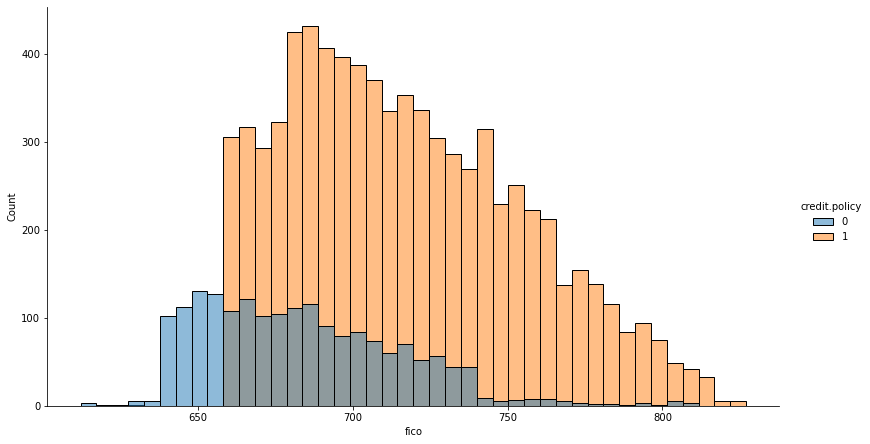

In [6]:
sns.displot(data=loans,x='fico',hue='credit.policy',height=6.27, aspect=14.7/8.27)

** Create a similar figure, except this time select by the not.fully.paid column.**

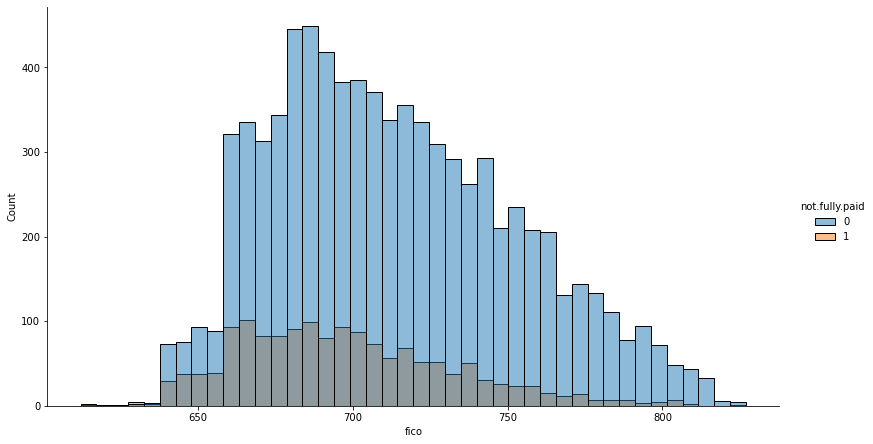

In [7]:
sns.displot(data=loans,x='fico',hue='not.fully.paid',height=6.27, aspect=14.7/8.27)

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

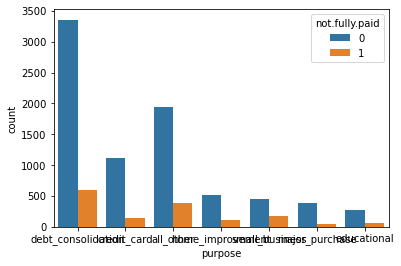

In [8]:
sns.countplot(data=loans,x='purpose',hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

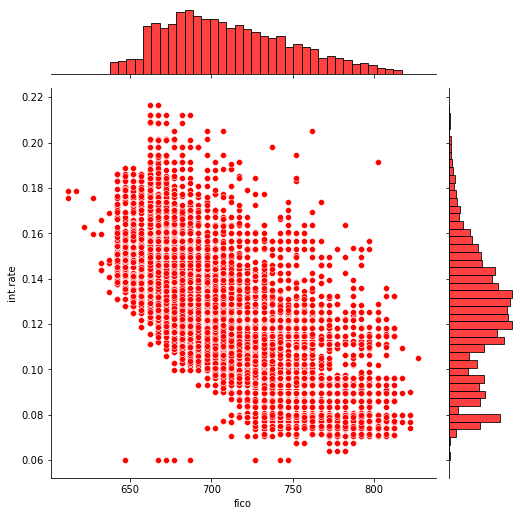

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loans,kind='scatter',color='r',height=7.27)

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

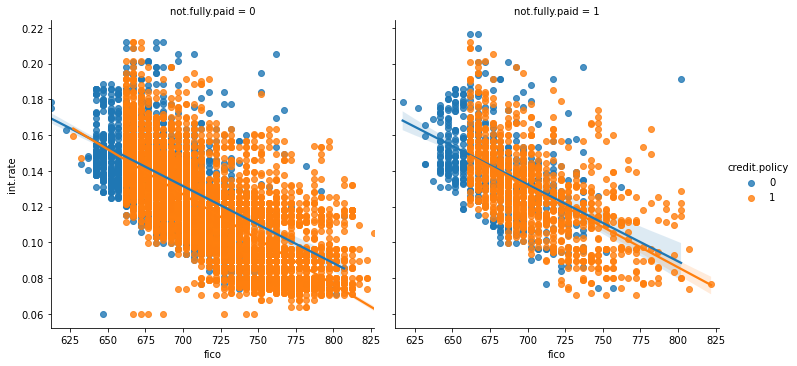

In [10]:
sns.lmplot(x='fico',y='int.rate',data=loans,hue='credit.policy',col='not.fully.paid')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [11]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [12]:
cat_feats = pd.get_dummies(loans['purpose'],drop_first=True)

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [13]:
loans=pd.concat([loans,cat_feats],axis=1)

In [14]:
final_data = loans.drop('purpose',axis=1)

In [15]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [21]:
pred = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2661
           1       0.21      0.23      0.22       500

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [24]:
print(confusion_matrix(y_test,pred))

[[2212  449]
 [ 383  117]]


[Text(144.52326780522824, 214.78829268292682, 'X[0] <= 0.5\ngini = 0.27\nsamples = 6417\nvalue = [5384, 1033]'),
 Text(80.63456435737571, 209.48487804878047, 'X[9] <= 6.5\ngini = 0.401\nsamples = 1257\nvalue = [908, 349]'),
 Text(66.41613381017186, 204.18146341463415, 'X[2] <= 688.415\ngini = 0.382\nsamples = 1054\nvalue = [783, 271]'),
 Text(54.951618191600474, 198.8780487804878, 'X[3] <= 11.263\ngini = 0.368\nsamples = 986\nvalue = [746, 240]'),
 Text(40.16027091179543, 193.57463414634145, 'X[12] <= 0.5\ngini = 0.394\nsamples = 744\nvalue = [543, 201]'),
 Text(21.72921733075925, 188.2712195121951, 'X[4] <= 15.41\ngini = 0.411\nsamples = 648\nvalue = [461, 187]'),
 Text(9.370580751337153, 182.96780487804878, 'X[6] <= 450.021\ngini = 0.374\nsamples = 365\nvalue = [274, 91]'),
 Text(2.7200962116656644, 177.66439024390243, 'X[8] <= 26.95\ngini = 0.499\nsamples = 23\nvalue = [12, 11]'),
 Text(1.7556299648700826, 172.3609756097561, 'X[9] <= 1.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),

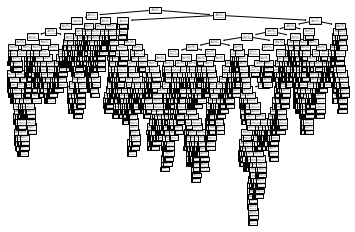

In [35]:
from sklearn import tree
tree.plot_tree(dtree)

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=300)

In [27]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [28]:
pred_rfc = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [29]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2661
           1       0.44      0.02      0.04       500

    accuracy                           0.84      3161
   macro avg       0.64      0.51      0.48      3161
weighted avg       0.78      0.84      0.78      3161



In [30]:
print(confusion_matrix(y_test,pred_rfc))

[[2647   14]
 [ 489   11]]


**What performed better the random forest or the decision tree?**

In [31]:
#Random Forest was slightly better

# Great Job!